Importing libraries


# New Section

In [4]:
!pip install -U scikit-image matplotlib seaborn opencv-python


  Using cached scikit_image-0.25.2-cp312-cp312-win_amd64.whl.metadata (14 kB)
  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached imageio-2.37.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp312-cp312-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
Using cached scikit_image-0.25.2-cp312-cp312-win_amd64.whl (12.9 MB)
Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl (8.0 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none

Loading Dataset from Google Drive

In [6]:
# Basic Libraries
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Image Processing
from skimage.feature import hog
from skimage.feature import graycomatrix, graycoprops


from skimage.color import rgb2gray
from skimage.io import imread
from skimage.transform import resize

# ML Tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Classical ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Ensemble Models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier

# Saving Model
import joblib

# Plot Settings
plt.style.use("seaborn-v0_8")


sns.set_palette('muted')

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')


In [12]:
import os

dataset_path = 'dataset'  # Corrected: No need to include 'pythonBasics'

train_path = os.path.join(dataset_path, 'train_another')  # Removed leading '/'
validation_path = os.path.join(dataset_path, 'validation_another')
test_path = os.path.join(dataset_path, 'test')

print("Train Path: ", train_path)
print("Validation Path: ", validation_path)
print("Test Path: ", test_path)



Train Path:  dataset\train_another
Validation Path:  dataset\validation_another
Test Path:  dataset\test


Checking Dataset Readibility

In [13]:
import os

for label in ['damage', 'no_damage']:
    path = os.path.join(train_path, label)  # Construct path
    
    if os.path.exists(path):  # Check if path exists
        images = os.listdir(path)  # List images
        print(f"{label}: {len(images)} images")  # Print number of images
        print("Sample Images:", images[:5])  # Print first 5 images
    else:
        print(f"Warning: The directory {path} does not exist!")



damage: 5000 images
Sample Images: ['-93.55964_30.895018.jpeg', '-93.573763_30.693981.jpeg', '-93.578271_30.779923999999998.jpeg', '-93.59011_30.695412.jpeg', '-93.59030899999999_30.694764000000003.jpeg']
no_damage: 5000 images
Sample Images: ['-95.061275_29.831535.jpeg', '-95.061412_29.826522999999998.jpeg', '-95.061825_29.828608000000003.jpeg', '-95.061908_29.828245000000003.jpeg', '-95.061936_29.828088.jpeg']


In [14]:
import os

for label in ['damage', 'no_damage']:
    path = os.path.join(validation_path, label)
    images = os.listdir(path)
    print(f"{label}: {len(images)} images")
    print("Sample Images:", images[:5])

damage: 1000 images
Sample Images: ['-93.558326_30.895248.jpeg', '-93.563851_30.894492.jpeg', '-93.57315600000001_30.994087.jpeg', '-93.59649399999999_30.674293.jpeg', '-93.604811_30.793684999999996.jpeg']
no_damage: 1000 images
Sample Images: ['-95.061894_30.007746.jpeg', '-95.062123_30.056714000000003.jpeg', '-95.062218_30.055870000000002.jpeg', '-95.06228399999999_30.040324.jpeg', '-95.062765_29.830479999999998.jpeg']


In [15]:
import os

for label in ['damage', 'no_damage']:
    path = os.path.join(test_path, label)
    images = os.listdir(path)
    print(f"{label}: {len(images)} images")
    print("Sample Images:", images[:5])


damage: 1000 images
Sample Images: ['-93.548123_30.900623.jpeg', '-93.560128_30.894917.jpeg', '-93.578271_30.779923999999998.jpeg', '-93.590598_30.694956.jpeg', '-93.604017_30.793719.jpeg']
no_damage: 1000 images
Sample Images: ['-95.061894_30.007746.jpeg', '-95.061936_29.828088.jpeg', '-95.062123_30.056714000000003.jpeg', '-95.062203_29.82817.jpeg', '-95.062246_30.056189.jpeg']


**FEATURE EXTRACTION **

In [16]:
#Hog Features
from skimage.feature import hog

def extract_hog_features(image):
    gray_image = rgb2gray(image)
    features, _ = hog(
        gray_image,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        visualize=True
    )
    return features


In [17]:
#Color Histogram Features
import cv2

def extract_color_histogram(image, bins=(8, 8, 8)):
    # Convert image to RGB if it's not already
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate color histogram for each channel (R, G, B)
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])

    # Normalize the histogram and flatten it
    hist = cv2.normalize(hist, hist).flatten()
    return hist


In [18]:
#Combining All features into single Vector
def extract_all_features(image):
    hog_features = extract_hog_features(image)
    color_hist_features = extract_color_histogram(image)

    # Combine all features into a single feature vector
    combined_features = np.hstack([hog_features, color_hist_features])
    return combined_features


Loop Through All the images and

In [19]:
import os
from skimage.io import imread
from skimage.transform import resize

def process_images(dataset_path):
    X = []
    y = []

    # two classes: 'damage' and 'no_damage'
    labels = {'damage': 1, 'no_damage': 0}

    for label in labels.keys():
        folder_path = os.path.join(dataset_path, label)
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            try:
                # Read image
                image = imread(img_path)



                # Extract features
                features = extract_all_features(image)

                # Append features and label
                X.append(features)
                y.append(labels[label])
            except Exception as e:
                print(f"Failed to process {img_path}: {e}")

    return np.array(X), np.array(y)


In [20]:
X_train, y_train = process_images(train_path)
X_val, y_val = process_images(validation_path)
X_test, y_test = process_images(test_path)

print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Train set: (10000, 8612), (10000,)
Validation set: (2000, 8612), (2000,)
Test set: (2000, 8612), (2000,)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


Saving Extracted Feature



In [25]:
import os
import joblib

# Set the path to your desired folder
save_path = 'saved/'  # Use forward slash

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Define and check variables (ensure they exist)
# X_train, y_train, X_val, y_val, X_test, y_test, scaler = ...

# Save features and labels into a .pkl file
save_file = os.path.join(save_path, 'features_labels_scaler3.pkl')

joblib.dump((X_train, y_train, X_val, y_val, X_test, y_test, scaler), save_file)

print(f"Features saved successfully to: {save_file}")


Features saved successfully to: saved/features_labels_scaler3.pkl


In [26]:
import joblib
import os

# Correct file path (use raw string or forward slashes)
load_path = r'saved/features_labels_scaler3.pkl'
# OR
# load_path = 'F:/Code Practice/pythonBasics/saved/features_labels_scaler.pkl'

# Check if the file exists before loading
if os.path.exists(load_path):
    X_train, y_train, X_val, y_val, X_test, y_test, scaler = joblib.load(load_path)
    print(f"Loaded features with shape: {X_train.shape}")
else:
    print(f"Error: File not found at {load_path}")

Loaded features with shape: (10000, 8612)


Model Validation Phase

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'SVM': {
        'kernel': ['linear', 'rbf', 'poly'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    },
    'k-NN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski', 'euclidean', 'manhattan']
    },
    'Decision Tree': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    'Bagging': {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 0.7, 1.0]
    }
}

models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'k-NN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(estimator=DecisionTreeClassifier())
}

results = []


Logistic Regression Analysis

Logistic Regression Best Params: {'C': 0.01, 'solver': 'liblinear'}
Validation Set - Accuracy: 0.8820, Precision: 0.8930, Recall: 0.8680, F1 Score: 0.8803, ROC-AUC: 0.9455

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1000
           1       0.89      0.87      0.88      1000

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



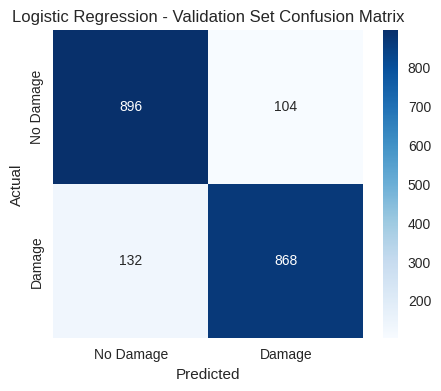

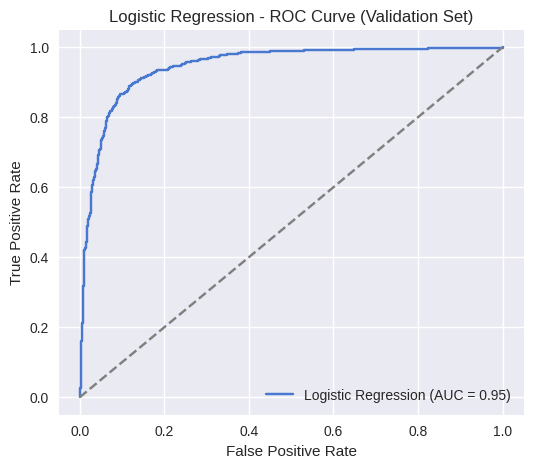

Number of errors: 236 out of 2000 samples
Error rate: 11.80%


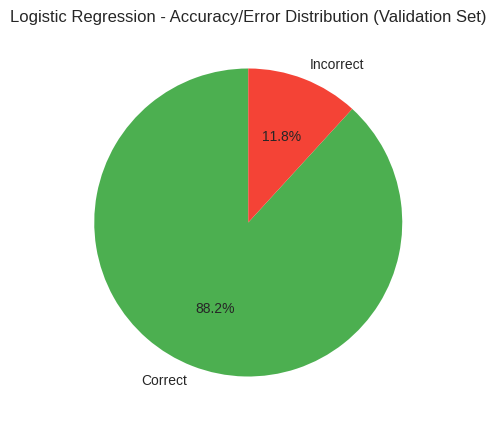

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt


# Hyperparameter Tuning & Training

model_name = "Logistic Regression"  # Change this for each model
model = models[model_name]
param_grid = param_grids[model_name]

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


# ✅ Validation Set Evaluation

y_val_pred = best_model.predict(X_val)
y_val_proba = best_model.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_proba)

results.append({
    'Model': model_name,
    'Best Params': grid_search.best_params_,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC': roc_auc
})

print(f"{model_name} Best Params: {grid_search.best_params_}")
print(f"Validation Set - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))


# Confusion Matrix

conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Damage', 'Damage'], yticklabels=['No Damage', 'Damage'])
plt.title(f'{model_name} - Validation Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# ROC Curve

fpr, tpr, _ = roc_curve(y_val, y_val_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title(f'{model_name} - ROC Curve (Validation Set)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


#  Visualization 3: Accuracy Errors
errors = (y_val_pred != y_val).sum()
total = len(y_val)
error_rate = errors / total

print(f"Number of errors: {errors} out of {total} samples")
print(f"Error rate: {error_rate:.2%}")

# Pie chart for accuracy vs errors
plt.figure(figsize=(5, 5))
plt.pie([total - errors, errors], labels=['Correct', 'Incorrect'], autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336'])
plt.title(f'{model_name} - Accuracy/Error Distribution (Validation Set)')
plt.show()


SVM With Different Kernel Performance Validation

SVM Best Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Validation Set - Accuracy: 0.8940, Precision: 0.9227, Recall: 0.8600, F1 Score: 0.8903, ROC-AUC: 0.9571

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1000
           1       0.92      0.86      0.89      1000

    accuracy                           0.89      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.90      0.89      0.89      2000



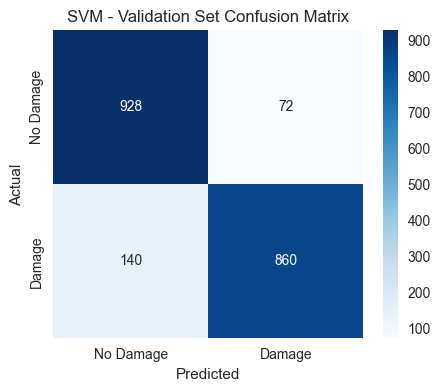

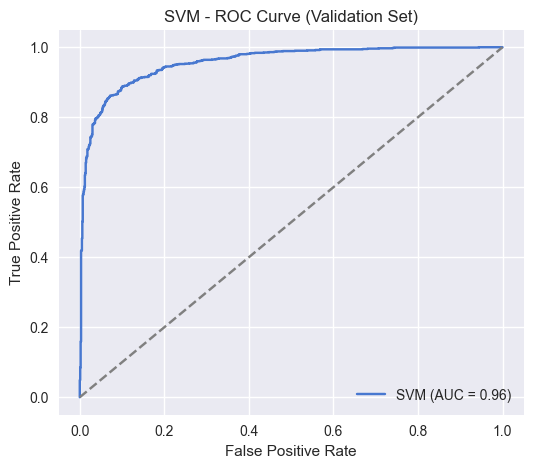

Number of errors: 212 out of 2000 samples
Error rate: 10.60%


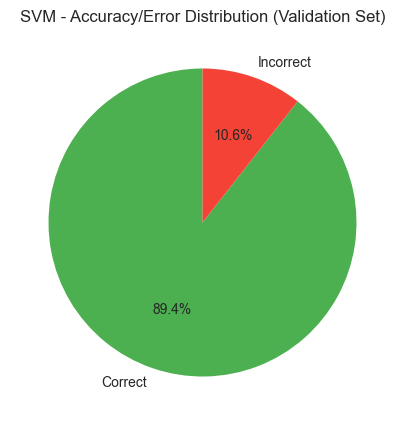

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt


# 🚀 Hyperparameter Tuning & Training
model_name = "SVM"
model = models[model_name]
param_grid = param_grids[model_name]

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


#  Validation Set Evaluation

y_val_pred = best_model.predict(X_val)
y_val_proba = best_model.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_proba)

results.append({
    'Model': model_name,
    'Best Params': grid_search.best_params_,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC': roc_auc
})

print(f"{model_name} Best Params: {grid_search.best_params_}")
print(f"Validation Set - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))


#  Visualization 1: Confusion Matrix

conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Damage', 'Damage'], yticklabels=['No Damage', 'Damage'])
plt.title(f'{model_name} - Validation Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#  ROC Curve

fpr, tpr, _ = roc_curve(y_val, y_val_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title(f'{model_name} - ROC Curve (Validation Set)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Visualization 3: Accuracy Errors

errors = (y_val_pred != y_val).sum()
total = len(y_val)
error_rate = errors / total

print(f"Number of errors: {errors} out of {total} samples")
print(f"Error rate: {error_rate:.2%}")

# Pie chart for accuracy vs errors)
plt.figure(figsize=(5, 5))
plt.pie([total - errors, errors], labels=['Correct', 'Incorrect'], autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336'])
plt.title(f'{model_name} - Accuracy/Error Distribution (Validation Set)')
plt.show()


K-NN Model Performance Validation

k-NN Best Params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Validation Set - Accuracy: 0.6065, Precision: 0.5612, Recall: 0.9760, F1 Score: 0.7127, ROC-AUC: 0.8624

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.24      0.38      1000
           1       0.56      0.98      0.71      1000

    accuracy                           0.61      2000
   macro avg       0.73      0.61      0.54      2000
weighted avg       0.73      0.61      0.54      2000



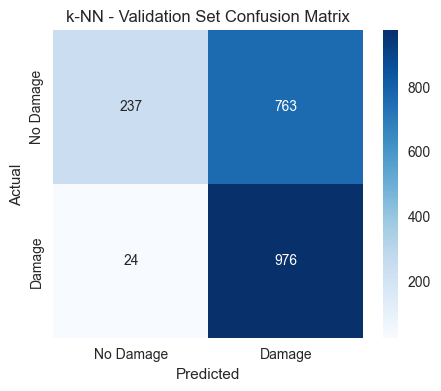

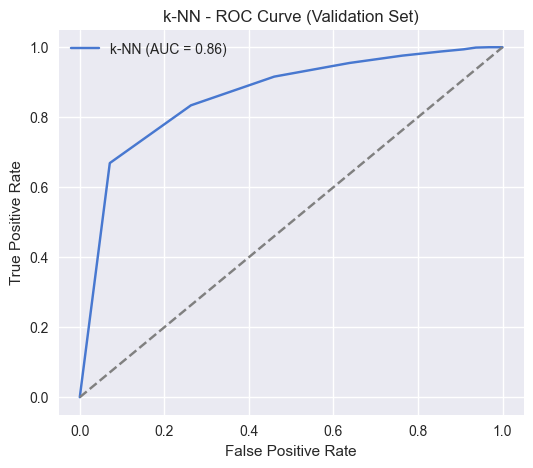

Number of errors: 787 out of 2000 samples
Error rate: 39.35%


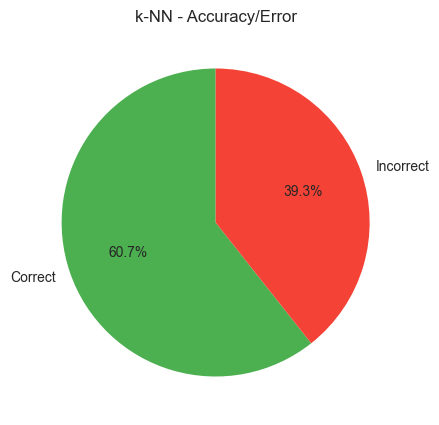

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt


#  Hyperparameter Tuning & Training
model_name = "k-NN"
model = models[model_name]
param_grid = param_grids[model_name]

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


# Validation Set Evaluation

y_val_pred = best_model.predict(X_val)
y_val_proba = best_model.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_proba)

results.append({
    'Model': model_name,
    'Best Params': grid_search.best_params_,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC': roc_auc
})

print(f"{model_name} Best Params: {grid_search.best_params_}")
print(f"Validation Set - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))


#   Confusion Matrix

conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Damage', 'Damage'], yticklabels=['No Damage', 'Damage'])
plt.title(f'{model_name} - Validation Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# ROC Curve

fpr, tpr, _ = roc_curve(y_val, y_val_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title(f'{model_name} - ROC Curve (Validation Set)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Accuracy Errors

errors = (y_val_pred != y_val).sum()
total = len(y_val)
error_rate = errors / total

print(f"Number of errors: {errors} out of {total} samples")
print(f"Error rate: {error_rate:.2%}")

# Pie chart for accuracy vs errors)
plt.figure(figsize=(5, 5))
plt.pie([total - errors, errors], labels=['Correct', 'Incorrect'], autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336'])
plt.title(f'{model_name} - Accuracy/Error')
plt.show()


Decision Tree Performance Validation

Decision Tree Best Params: {'max_depth': 5, 'min_samples_split': 2}
Validation Set - Accuracy: 0.8975, Precision: 0.8855, Recall: 0.9130, F1 Score: 0.8991, ROC-AUC: 0.9429

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1000
           1       0.89      0.91      0.90      1000

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



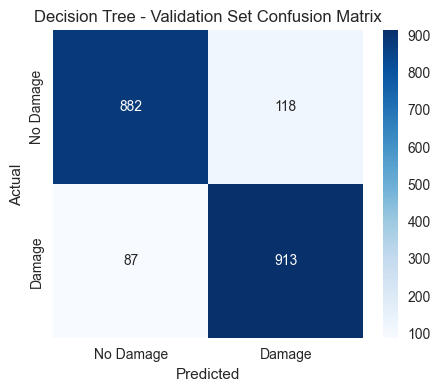

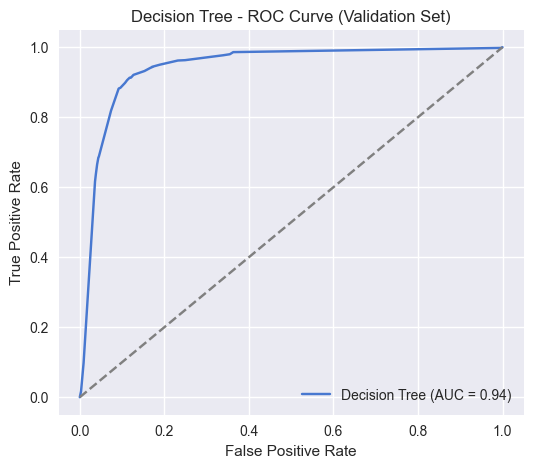

Number of errors: 205 out of 2000 samples
Error rate: 10.25%


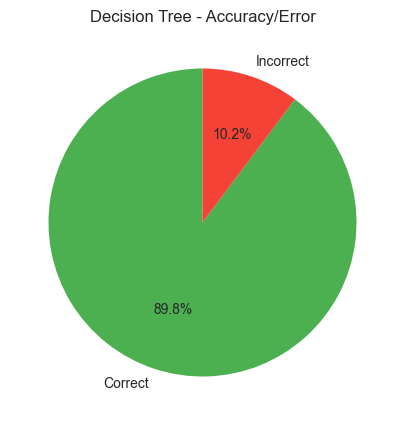

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt


#  Hyperparameter Tuning & Training
model_name = "Decision Tree"
model = models[model_name]
param_grid = param_grids[model_name]

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


# Validation Set Evaluation

y_val_pred = best_model.predict(X_val)
y_val_proba = best_model.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_proba)

results.append({
    'Model': model_name,
    'Best Params': grid_search.best_params_,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC': roc_auc
})

print(f"{model_name} Best Params: {grid_search.best_params_}")
print(f"Validation Set - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))


#   Confusion Matrix

conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Damage', 'Damage'], yticklabels=['No Damage', 'Damage'])
plt.title(f'{model_name} - Validation Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# ROC Curve

fpr, tpr, _ = roc_curve(y_val, y_val_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title(f'{model_name} - ROC Curve (Validation Set)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Accuracy Errors

errors = (y_val_pred != y_val).sum()
total = len(y_val)
error_rate = errors / total

print(f"Number of errors: {errors} out of {total} samples")
print(f"Error rate: {error_rate:.2%}")

# Pie chart for accuracy vs errors)
plt.figure(figsize=(5, 5))
plt.pie([total - errors, errors], labels=['Correct', 'Incorrect'], autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336'])
plt.title(f'{model_name} - Accuracy/Error')
plt.show()


Random Forest Performance Validation

Random Forest Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Validation Set - Accuracy: 0.8885, Precision: 0.8944, Recall: 0.8810, F1 Score: 0.8877, ROC-AUC: 0.9651

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1000
           1       0.89      0.88      0.89      1000

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



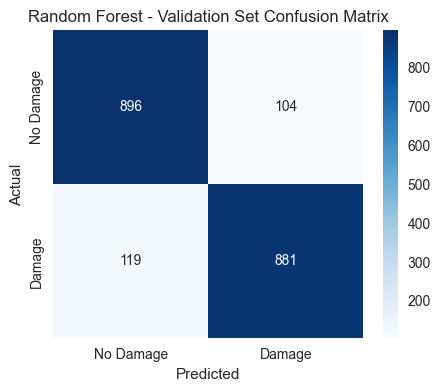

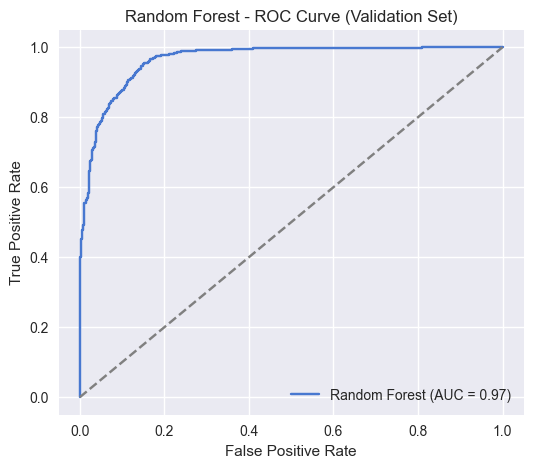

Number of errors: 223 out of 2000 samples
Error rate: 11.15%


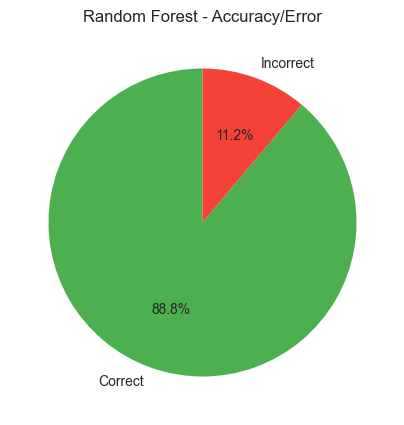

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt


#  Hyperparameter Tuning & Training
model_name = "Random Forest"
model = models[model_name]
param_grid = param_grids[model_name]

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


# Validation Set Evaluation

y_val_pred = best_model.predict(X_val)
y_val_proba = best_model.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_proba)

results.append({
    'Model': model_name,
    'Best Params': grid_search.best_params_,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC': roc_auc
})

print(f"{model_name} Best Params: {grid_search.best_params_}")
print(f"Validation Set - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))


#   Confusion Matrix

conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Damage', 'Damage'], yticklabels=['No Damage', 'Damage'])
plt.title(f'{model_name} - Validation Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# ROC Curve

fpr, tpr, _ = roc_curve(y_val, y_val_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title(f'{model_name} - ROC Curve (Validation Set)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Accuracy Errors

errors = (y_val_pred != y_val).sum()
total = len(y_val)
error_rate = errors / total

print(f"Number of errors: {errors} out of {total} samples")
print(f"Error rate: {error_rate:.2%}")

# Pie chart for accuracy vs errors)
plt.figure(figsize=(5, 5))
plt.pie([total - errors, errors], labels=['Correct', 'Incorrect'], autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336'])
plt.title(f'{model_name} - Accuracy/Error')
plt.show()


Applying Best model After Model Finalization

Best Model: Decision Tree
Best Params: {'max_depth': 5, 'min_samples_split': 2}

Final Test Set Performance - Decision Tree
Accuracy: 0.8930
Precision: 0.8861
Recall: 0.9020
F1 Score: 0.8940
ROC-AUC: 0.9418

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1000
           1       0.89      0.90      0.89      1000

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



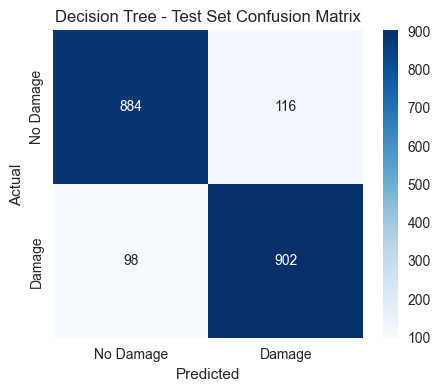

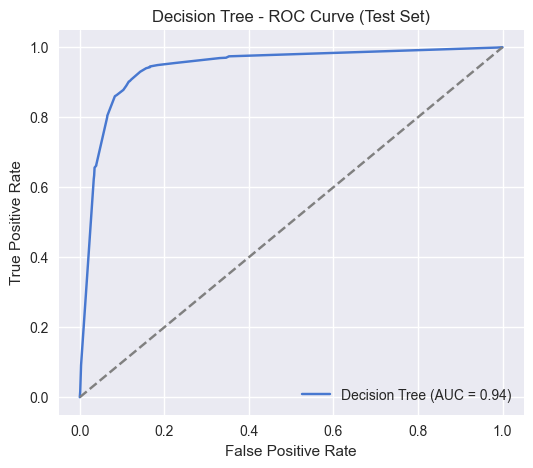


Number of errors: 214 out of 2000 samples
Error rate: 10.70%


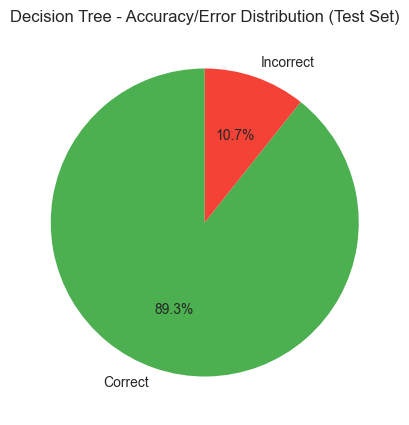

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------ #
# ✅ Final Evaluation with Best Parameters for Decision Tree
# ------------------------------ #

best_model_name = 'Decision Tree'
best_model_params = {'max_depth': 5, 'min_samples_split': 2}

print(f"Best Model: {best_model_name}")
print(f"Best Params: {best_model_params}")

# Initialize and train the final model with the best parameters
from sklearn.tree import DecisionTreeClassifier

final_model = DecisionTreeClassifier(**best_model_params)
final_model.fit(X_train, y_train)

# Predict on the Test Set
y_test_pred = final_model.predict(X_test)
y_test_proba = final_model.predict_proba(X_test)[:, 1]

# ------------------------------ #
# ✅ Evaluate Test Performance
# ------------------------------ #

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_proba)

print(f"\nFinal Test Set Performance - {best_model_name}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# ------------------------------ #
# 📊 Visualization 1: Confusion Matrix
# ------------------------------ #

conf_matrix_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['No Damage', 'Damage'], yticklabels=['No Damage', 'Damage'])
plt.title(f'{best_model_name} - Test Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ------------------------------ #
# 📈 Visualization 2: ROC Curve
# ------------------------------ #

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr_test, tpr_test, label=f'{best_model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title(f'{best_model_name} - ROC Curve (Test Set)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# ------------------------------ #
# 📉 Visualization 3: Accuracy Errors Pie Chart
# ------------------------------ #

errors = (y_test_pred != y_test).sum()
total = len(y_test)
error_rate = errors / total

print(f"\nNumber of errors: {errors} out of {total} samples")
print(f"Error rate: {error_rate:.2%}")

# Pie chart for accuracy vs errors
plt.figure(figsize=(5, 5))
plt.pie(
    [total - errors, errors],
    labels=['Correct', 'Incorrect'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4CAF50', '#F44336']
)
plt.title(f'{best_model_name} - Accuracy/Error Distribution (Test Set)')
plt.show()


Exporting Final Model

In [44]:
import joblib

# Save the trained final model
joblib.dump(final_model, 'decision_tree_final_model.pkl')

print("Final model saved as 'decision_tree_final_model.pkl'")


Final model saved as 'decision_tree_final_model.pkl'
